In [1]:
!pip install chardet
!pip install tensorflow
!pip install seaborn

Unable to create process using 'C:\Users\GOVARDHAN REDDY\anaconda3\python.exe "C:\Users\GOVARDHAN REDDY\anaconda3\Scripts\pip-script.py" install chardet'


Unable to create process using 'C:\Users\GOVARDHAN REDDY\anaconda3\python.exe "C:\Users\GOVARDHAN REDDY\anaconda3\Scripts\pip-script.py" install tensorflow'
Unable to create process using 'C:\Users\GOVARDHAN REDDY\anaconda3\python.exe "C:\Users\GOVARDHAN REDDY\anaconda3\Scripts\pip-script.py" install seaborn'


In [2]:
# Import required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, silhouette_score
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Conv2D, MaxPooling2D, Flatten, concatenate
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
import chardet

In [ ]:
# Step 1: Load the Dataset
csv_filepath = "C:\\Users\\GOVARDHAN REDDY\\Downloads\\book32-listing.csv"

In [ ]:
# # Detect encoding of the CSV file
# with open(csv_filepath, 'rb') as f:
#     result = chardet.detect(f.read())
#     print(f"Detected encoding: {result['encoding']}")

In [5]:

# Define columns and load the CSV
header_names = ['Amazon ID (ASIN)', 'Filename', 'Image URL', 'Title', 'Author', 'Category ID', 'Category']
with open(csv_filepath, mode='r', encoding='SHIFT_JIS', errors='ignore') as f:
    data = pd.read_csv(f, names=header_names, delimiter=",", header=None)

data.head() 

,Amazon ID (ASIN),Filename,Image URL,Title,Author,Category ID,Category
0,761183272,0761183272.jpg,http://ecx.images-amazon.com/images/I/61Y5cOdH...,Mom's Family Wall Calendar 2016,Sandra Boynton,3,Calendars
1,1623439671,1623439671.jpg,http://ecx.images-amazon.com/images/I/61t-hrSw...,Doug the Pug 2016 Wall Calendar,Doug the Pug,3,Calendars
2,B00O80WC6I,B00O80WC6I.jpg,http://ecx.images-amazon.com/images/I/41X-KQqs...,"Moleskine 2016 Weekly Notebook, 12M, Large, Bl...",Moleskine,3,Calendars
3,761182187,0761182187.jpg,http://ecx.images-amazon.com/images/I/61j-4gxJ...,365 Cats Color Page-A-Day Calendar 2016,Workman Publishing,3,Calendars
4,1578052084,1578052084.jpg,http://ecx.images-amazon.com/images/I/51Ry4Tsq...,Sierra Club Engagement Calendar 2016,Sierra Club,3,Calendars


In [6]:
# Step 2: Data Preprocessing (No need to map Category)
# Drop missing values for essential columns
data = data.dropna(subset=['Title', 'Filename', 'Category'])
data.head()

,Amazon ID (ASIN),Filename,Image URL,Title,Author,Category ID,Category
0,761183272,0761183272.jpg,http://ecx.images-amazon.com/images/I/61Y5cOdH...,Mom's Family Wall Calendar 2016,Sandra Boynton,3,Calendars
1,1623439671,1623439671.jpg,http://ecx.images-amazon.com/images/I/61t-hrSw...,Doug the Pug 2016 Wall Calendar,Doug the Pug,3,Calendars
2,B00O80WC6I,B00O80WC6I.jpg,http://ecx.images-amazon.com/images/I/41X-KQqs...,"Moleskine 2016 Weekly Notebook, 12M, Large, Bl...",Moleskine,3,Calendars
3,761182187,0761182187.jpg,http://ecx.images-amazon.com/images/I/61j-4gxJ...,365 Cats Color Page-A-Day Calendar 2016,Workman Publishing,3,Calendars
4,1578052084,1578052084.jpg,http://ecx.images-amazon.com/images/I/51Ry4Tsq...,Sierra Club Engagement Calendar 2016,Sierra Club,3,Calendars


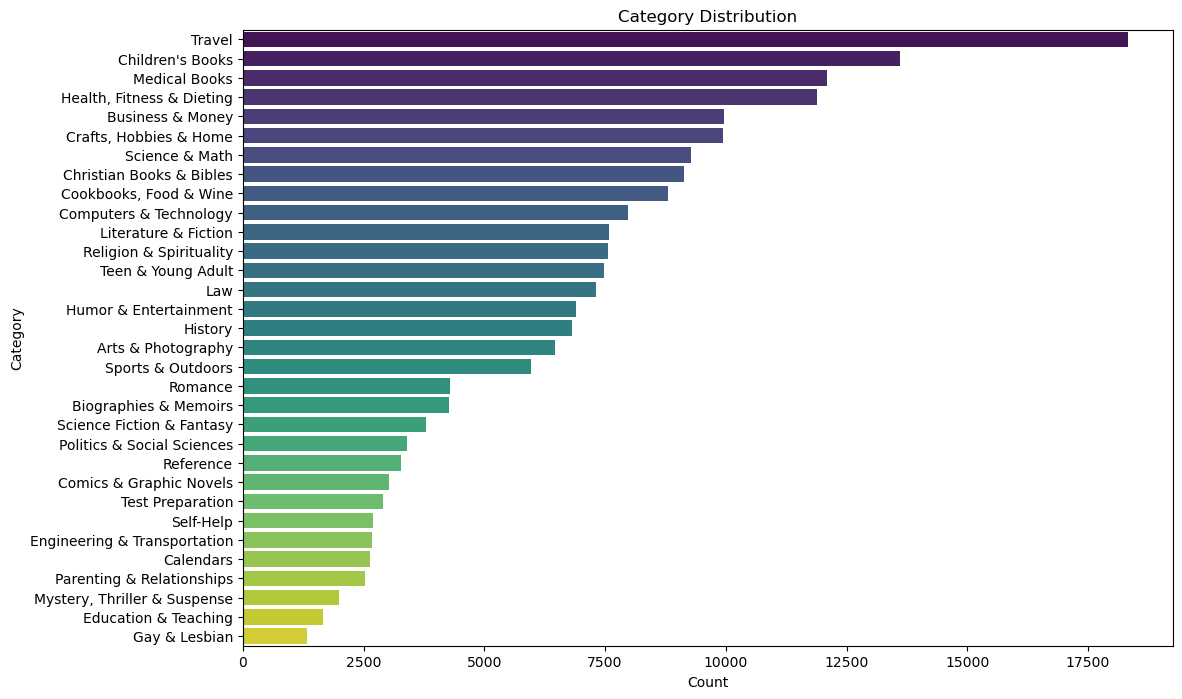

In [7]:
# Visualize the category distribution
plt.figure(figsize=(12, 8))
sns.countplot(y=data['Category'], order=data['Category'].value_counts().index, palette='viridis')
plt.title("Category Distribution")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

In [8]:
len(data)

207572

In [9]:
#For selecting random data across categories

# Calculate the number of rows per category
num_categories = data['Category'].nunique()
rows_per_category = 10000 // num_categories  # Target rows per category
print(f"Target rows per category: {rows_per_category}")

# Sample rows from each category without exceeding available rows
sampled_data = data.groupby('Category').apply(
    lambda x: x.sample(n=min(len(x), rows_per_category), random_state=42)
).reset_index(drop=True)

# Debugging Information
print(f"Shape of sampled data: {sampled_data.shape}")
print("Category distribution in sampled data:")
print(sampled_data['Category'].value_counts())

# Shuffle the final dataset to ensure randomness
sampled_data = sampled_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Update the dataset
data = sampled_data


Target rows per category: 312
Shape of sampled data: (9984, 7)
Category distribution in sampled data:
Category
Arts & Photography              312
Biographies & Memoirs           312
Test Preparation                312
Teen & Young Adult              312
Sports & Outdoors               312
Self-Help                       312
Science Fiction & Fantasy       312
Science & Math                  312
Romance                         312
Religion & Spirituality         312
Reference                       312
Politics & Social Sciences      312
Parenting & Relationships       312
Mystery, Thriller & Suspense    312
Medical Books                   312
Literature & Fiction            312
Law                             312
Humor & Entertainment           312
History                         312
Health, Fitness & Dieting       312
Gay & Lesbian                   312
Engineering & Transportation    312
Education & Teaching            312
Crafts, Hobbies & Home          312
Cookbooks, Food & Wine   

In [10]:
# Step 3: Text Preprocessing (Book Titles)
max_words = 5000  # Maximum vocabulary size
max_len = 20      # Maximum length of title sequences

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['Title'])
title_sequences = tokenizer.texts_to_sequences(data['Title'])
title_data = pad_sequences(title_sequences, maxlen=max_len)

##### Shape of title data

In [11]:
title_data.shape

(9984, 20)

### Downloading images locally

In [12]:
# import os
# import codecs
# import pandas as pd
# from urllib import request
# from tqdm import trange
# from joblib import Parallel, delayed

# # Define arguments (normally passed via command line)
# output_dirpath = "images"
# csv_filepath = "book32-listing.csv"
# latest_img_index = 203715
# # Create directories if they don't exist
# if not os.path.isdir(output_dirpath):
#     os.makedirs(output_dirpath)

# # Define CSV headers and load data
# header_names = ['Amazon ID (ASIN)', 'Filename', 'Image URL', 'Title', 'Author', 'Category ID', 'Category']
# with codecs.open(csv_filepath, mode='r', encoding='utf-8', errors='ignore') as f:
#     csv = pd.read_csv(f, delimiter=",", header=None, names=header_names)

# # Print output directory information
# print(f'[Download images into "{output_dirpath}"]')

# # Define the image download function
# def download_image(i):
#     print(f'downloading for index: {i}')
#     filename = csv.iloc[i]['Filename']
#     category = csv.iloc[i]['Category']
#     inner_output_dirpath = os.path.join(output_dirpath, category)
#     if not os.path.isdir(inner_output_dirpath):
#         os.mkdir(inner_output_dirpath)
#     output_filepath = os.path.join(inner_output_dirpath, filename)

#     url = csv.iloc[i]['Image URL']
#     if not os.path.isfile(output_filepath):
#         downloaded_img = request.urlopen(url)
#         with open(output_filepath, mode='wb') as f:
#             f.write(downloaded_img.read())
#         print(f"Downloaded {filename}")
#     else:
#         print(f'exists {i}')
#     latest_img_index = i
    

# download_images = lambda index: Parallel(n_jobs=-1)(delayed(lambda i: (download_image(i)))(i) for i in trange(index,len(csv))) 
# # Parallel execution using joblib
# try:
#     download_images(latest_img_index)
# except Exception as e:
#     print(e)
#     download_images(latest_img_index)



In [13]:
# Step 4: Image Preprocessing (Book Covers by Category Folder)
img_size = (224, 224)
image_folder = 'C:\\Users\\GOVARDHAN REDDY\\Downloads\\images'  # Update this with your actual image folder path


def preprocess_image(img_path):
    try:
        img = load_img(img_path, target_size=img_size)
        img = img_to_array(img) / 255.0  # Normalize pixel values
        return img
    except Exception as e:
        print(f"Error loading image {img_path}: {e}")
        return None  # Return None if the image can't be loaded

In [14]:
# Load and preprocess the images
image_data = []
missing_files = []

for index, row in tqdm(data.iterrows(), total=len(data)):
    category_name = row['Category']
    img_filename = row['Filename']
    img_path = os.path.join(image_folder, category_name, img_filename)
    
    if os.path.exists(img_path):
        img_array = preprocess_image(img_path)
        if img_array is not None:
            image_data.append(img_array)
        else:
            missing_files.append(img_filename)
    else:
        missing_files.append(img_filename)


  8%|██████                                                                        | 780/9984 [00:02<00:54, 169.84it/s]

Error loading image C:\Users\GOVARDHAN REDDY\Downloads\images\Children's Books\1476552150.jpg: cannot identify image file <_io.BytesIO object at 0x00000158772462A0>


 47%|████████████████████████████████████▌                                        | 4734/9984 [00:24<00:35, 145.98it/s]

Error loading image C:\Users\GOVARDHAN REDDY\Downloads\images\Children's Books\1492309532.jpg: cannot identify image file <_io.BytesIO object at 0x00000158772022F0>


 65%|█████████████████████████████████████████████████▊                           | 6455/9984 [00:33<00:21, 167.40it/s]

Error loading image C:\Users\GOVARDHAN REDDY\Downloads\images\Children's Books\1494240106.jpg: cannot identify image file <_io.BytesIO object at 0x0000015877297920>


 67%|███████████████████████████████████████████████████▍                         | 6665/9984 [00:34<00:16, 197.71it/s]

Error loading image C:\Users\GOVARDHAN REDDY\Downloads\images\Religion & Spirituality\0996458107.jpg: cannot identify image file <_io.BytesIO object at 0x00000158772462A0>


 72%|███████████████████████████████████████████████████████▌                     | 7210/9984 [00:37<00:21, 130.53it/s]

Error loading image C:\Users\GOVARDHAN REDDY\Downloads\images\Travel\0967890489.jpg: cannot identify image file <_io.BytesIO object at 0x00000158772DAE30>


 80%|█████████████████████████████████████████████████████████████▍               | 7970/9984 [00:42<00:12, 166.78it/s]

Error loading image C:\Users\GOVARDHAN REDDY\Downloads\images\Religion & Spirituality\0553383760.jpg: cannot identify image file <_io.BytesIO object at 0x00000158772462A0>


 81%|██████████████████████████████████████████████████████████████▌              | 8104/9984 [00:43<00:11, 170.22it/s]

Error loading image C:\Users\GOVARDHAN REDDY\Downloads\images\Religion & Spirituality\1907486909.jpg: cannot identify image file <_io.BytesIO object at 0x00000158772022F0>


 83%|███████████████████████████████████████████████████████████████▊             | 8280/9984 [00:44<00:13, 130.87it/s]

Error loading image C:\Users\GOVARDHAN REDDY\Downloads\images\Children's Books\1404806563.jpg: cannot identify image file <_io.BytesIO object at 0x00000158772DAE30>


 85%|█████████████████████████████████████████████████████████████████▏           | 8446/9984 [00:45<00:09, 158.44it/s]

Error loading image C:\Users\GOVARDHAN REDDY\Downloads\images\Travel\0739197258.jpg: cannot identify image file <_io.BytesIO object at 0x000001586F5375B0>


100%|█████████████████████████████████████████████████████████████████████████████| 9984/9984 [00:53<00:00, 185.57it/s]


In [15]:
#Remove entries with missing images from data and recreate title_data
data = data[~data['Filename'].isin(missing_files)].reset_index(drop=True)

# Recreate title_data from the filtered data
title_data = tokenizer.texts_to_sequences(data['Title'])
title_data = pad_sequences(title_data, maxlen=max_len)

# Convert image_data to a numpy array
image_data = np.array(image_data)

In [16]:
# Step 6: Modeling - Feature Extraction
# Text Model - Word Embedding + LSTM
title_input = Input(shape=(max_len,), name="Title_Input")
x_title = Embedding(input_dim=max_words, output_dim=128)(title_input)
x_title = LSTM(128)(x_title)

In [17]:
# Image Model - CNN
image_input = Input(shape=(224, 224, 3), name="Image_Input")
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=image_input)
x_image = base_model.output
x_image = Flatten()(x_image)
x_image = Dense(128, activation='relu')(x_image)

In [18]:
# Combine Text and Image Features
combined = concatenate([x_title, x_image])
combined_output = Dense(256, activation='relu')(combined)
combined_output = Dropout(0.5)(combined_output)
final_output = Dense(len(data['Category ID'].unique()), activation='softmax')(combined_output)

In [19]:
# Model Creation and Compilation
model = Model(inputs=[title_input, image_input], outputs=final_output)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
# Model Summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Image_Input (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1 (Conv2D)         │ (None, 224, 224, 64)      │           1,792 │ Image_Input[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2 (Conv2D)         │ (None, 224, 224, 64)      │          36,928 │ block1_conv1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_pool (MaxPooling2D)    │ (None, 112, 112, 64)      │               0 │ block1_conv2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_conv1 (Conv2D)         │ (None, 112, 112, 128)     │          73,856 │ block1_pool[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_conv2 (Conv2D)         │ (None, 112, 112, 128)     │         147,584 │ block2_conv1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_pool (MaxPooling2D)    │ (None, 56, 56, 128)       │               0 │ block2_conv2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block3_conv1 (Conv2D)         │ (None, 56, 56, 256)       │         295,168 │ block2_pool[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block3_conv2 (Conv2D)         │ (None, 56, 56, 256)       │         590,080 │ block3_conv1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block3_conv3 (Conv2D)         │ (None, 56, 56, 256)       │         590,080 │ block3_conv2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block3_pool (MaxPooling2D)    │ (None, 28, 28, 256)       │               0 │ block3_conv3[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block4_conv1 (Conv2D)         │ (None, 28, 28, 512)       │       1,180,160 │ block3_pool[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block4_conv2 (Conv2D)         │ (None, 28, 28, 512)       │       2,359,808 │ block4_conv1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block4_conv3 (Conv2D)         │ (None, 28, 28, 512)       │       2,359,808 │ block4_conv2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block4_pool (MaxPooling2D)    │ (None, 14, 14, 512)       │               0 │ block4_conv3[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block5_conv1 (Conv2D)         │ (None, 14, 14, 512)       │       2,359,808 │ block4_pool[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block5_conv2 (Conv2D)         │ (None, 14, 14, 512)       │       2,359,808 │ block5_conv1[0][0]         │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 18,771,680 (71.61 MB)

 Trainable params: 18,771,680 (71.61 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Step 7: Train-Test Split and Data Preparation
X_train_title, X_test_title, X_train_image, X_test_image, y_train, y_test = train_test_split(
    title_data, image_data, data['Category ID'], test_size=0.1, random_state=42)

In [22]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=len(data['Category ID'].unique()))
y_test = to_categorical(y_test, num_classes=len(data['Category ID'].unique()))

In [ ]:
# Step 8: Model Training
history = model.fit([X_train_title, X_train_image], y_train,
                    validation_data=([X_test_title, X_test_image], y_test),
                    epochs=10, batch_size=32)    

Epoch 1/10


C:\Users\GOVARDHAN REDDY\AppData\Roaming\Python\Python311\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['Title_Input', 'Image_Input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


281/281 ━━━━━━━━━━━━━━━━━━━━ 5623s 20s/step - accuracy: 0.0523 - loss: 3.8771 - val_accuracy: 0.1603 - val_loss: 2.9914
Epoch 2/10
 27/281 ━━━━━━━━━━━━━━━━━━━━ 56:41 13s/step - accuracy: 0.1531 - loss: 2.9708

In [ ]:
# Step 9: Model Evaluation
results = model.evaluate([X_test_title, X_test_image], y_test)
print(f"Test Accuracy: {results[1]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1000 - loss: 3.4083
Test Accuracy: 0.10000000149011612


In [ ]:
# Generate Classification Report
y_pred = model.predict([X_test_title, X_test_image])
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [ ]:
print(classification_report(y_true_classes, y_pred_classes))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1
          17       0.10      1.00      0.18         1
          19       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         1

    accuracy                           0.10        10
   macro avg       0.01      0.12      0.02        10
weighted avg       0.01      0.10      0.02        10



C:\Users\GOVARDHAN REDDY\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GOVARDHAN REDDY\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GOVARDHAN REDDY\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Step 10: Unsupervised Clustering with KMeans
feature_model = Model(inputs=[title_input, image_input], outputs=combined_output)
features = feature_model.predict([title_data, image_data])

C:\Users\GOVARDHAN REDDY\AppData\Roaming\Python\Python311\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['Title_Input', 'Image_Input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step


In [ ]:
# Apply KMeans Clustering
n_clusters = len(data['Category ID'].unique())
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(features)


C:\Users\GOVARDHAN REDDY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\GOVARDHAN REDDY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=32, random_state=42)

In [ ]:
# Evaluate Clustering with Silhouette Score
sil_score = silhouette_score(features, kmeans.labels_)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.06871375441551208


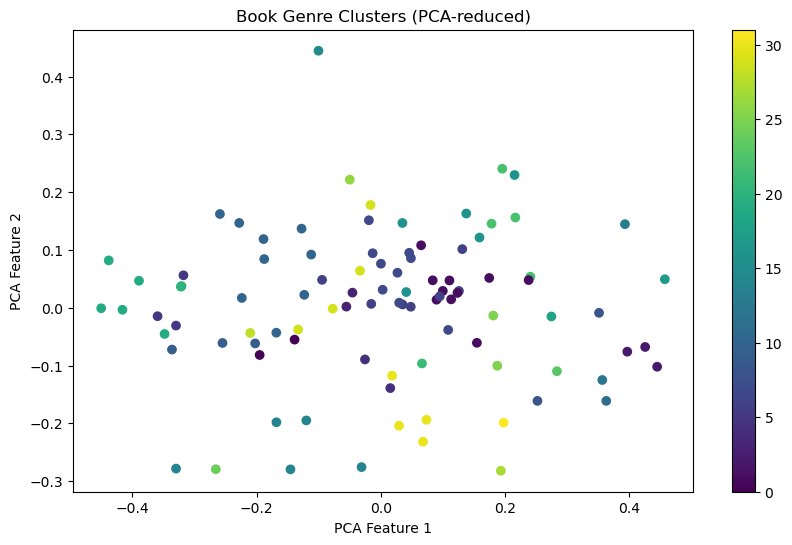

In [ ]:
# PCA for Visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)

plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=kmeans.labels_, cmap='viridis')
plt.colorbar()
plt.title("Book Genre Clusters (PCA-reduced)")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.show()

In [ ]:
# Step 11: Model Saving
model.save('book_genre_classification_model.h5')
print("Model saved successfully.")

Model saved successfully.
